In [94]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Generate Data


For this example we are using Econometrics data on GDP , CPI and Imports from 1975 - 2005

In [105]:
cpi_list = [53.8,56.9,60.6,65.2,72.6,82.4,90.9,96.5,99.6,
            103.9,107.6,109.6,113.6,118.3,124.0,130.7,136.2,140.3,144.5,148.2,
            152.4,156.9,160.5,163.0,166.6,172.2,177.1,179.9,184.0,188.9,195.3]

GDP_list = [1638.3,1825.3,2023.9,2294.7,2563.3,2789.5,3128.4,3225.0,3536.7,3933.2,4220.3,
            4462.8,4739.5,5103.8,5484.4,5803.1,5995.9,6337.7,6657.4,7072.2,7397.7,7816.9,8304.3,
            8747.0,9268.4,9817.0,10128.0,10469.6,10960.8,11712.5,12455.8]

imports_list = [98185,124228,151907,176002,212007,249750,265067,247642,268901,332418,
                338088,368425,409765,447189,477665,498438,491020,536528,589394,668690,749374,
                803113,876470,917103,1029980,1224408,1145900,1164720,1260717,1472926,1677371]

data = pd.DataFrame({'CPI':cpi_list ,'GDP':GDP_list , 'Imports':imports_list} , index = [i for i in range(1975,2006)])

In [106]:
data

,CPI,GDP,Imports
1975,53.8,1638.3,98185
1976,56.9,1825.3,124228
1977,60.6,2023.9,151907
1978,65.2,2294.7,176002
1979,72.6,2563.3,212007
1980,82.4,2789.5,249750
1981,90.9,3128.4,265067
1982,96.5,3225.0,247642
1983,99.6,3536.7,268901
1984,103.9,3933.2,332418


In [107]:
'''
Reading_a_stata_file
df = pd.read_stata('')

Saving into a csv or any other file into stata fille by changing the extension into .dta

df.to_stata('my_data_out.dta')

saving econometrics data output
'''

data.to_stata('homework_data_full.dta')

In [91]:
#pd.read_stata('C:/Users/CoderZzyzx/Desktop/UNTIL MAY 30TH/All things Data S and AI/PyTorch/my_data_in.dta')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/CoderZzyzx/Desktop/UNTIL MAY 30TH/All things Data S and AI/PyTorch/my_data_in.dta'

# Generate X and Y for model

generate x and y features as numpy arrays and convert into tensors. afterwards pass into TensorDataset and Dataloader to split into batches and shuffle

In [3]:
#X and y tensor data
'''
X = torch.tensor(data.loc[: , 'CPI':'GDP'].to_numpy() , dtype=torch.float64)
y = torch.tensor(data.loc[: , 'Imports'].to_numpy().reshape(-1,1) , dtype=torch.float64)
'''

X = torch.tensor(data[['CPI','GDP']].values , dtype=torch.float32)
y = torch.tensor(data[['Imports']].values , dtype=torch.float32)

In [63]:
#define train dataset and train_ dataloader
from torch.utils.data import TensorDataset , DataLoader, random_split
full_dataset = TensorDataset(X,y)

#random split into train and validation set 
train_ds, val_ds = random_split(full_dataset, [20, 11])

chosen_batch=5
train_loader = DataLoader(train_ds, chosen_batch, shuffle=True)
val_loader = DataLoader(val_ds, chosen_batch*2)

input_size=2
output_size = 1

learning_rate= 5

# Define Linear Regression Model

In this trial we will be exploring neural network linear regression model's( nn.Linear()) and specify number of weights/beta's and constants/bias 

In [64]:
lin_model = nn.Linear(2 , 1)
print(lin_model.weight)
print(lin_model.bias)

Parameter containing:
tensor([[-0.4727,  0.1845]], requires_grad=True)
Parameter containing:
tensor([-0.5342], requires_grad=True)


In [65]:
#check Parameters
list(lin_model.parameters())

[Parameter containing:
 tensor([[-0.4727,  0.1845]], requires_grad=True),
 Parameter containing:
 tensor([-0.5342], requires_grad=True)]

In [66]:
#generate predictions with unfitted model
unfitted_pred = lin_model(X)

In [67]:
'''
#Generate predictions
pred = lin_model(X)

#Calculate loss
loss=loss_fn(pred , y)


#Compute gradients
loss.backward()

#update model parameters
optimizer.step()

#Reset model parameters to zero
optimizer.zero_grad()

#Recalculate predictions
new_pred = lin_model(X)

#Calculate loss
loss=loss_fn(new_pred , y)
'''

'\n#Generate predictions\npred = lin_model(X)\n\n#Calculate loss\nloss=loss_fn(pred , y)\n\n\n#Compute gradients\nloss.backward()\n\n#update model parameters\noptimizer.step()\n\n#Reset model parameters to zero\noptimizer.zero_grad()\n\n#Recalculate predictions\nnew_pred = lin_model(X)\n\n#Calculate loss\nloss=loss_fn(new_pred , y)\n'

# Define Loss function
 we will be using nn.functional.mse , that is the mean_squarred_error for

In [68]:
loss_fn = F.mse_loss

# Optimizer

we will use the optim.SGD that is the Stochastic Gradient Descent and spcify ,opd

In [69]:
optimizer = torch.optim.SGD(lin_model.parameters(), lr=0.5)

# Training Function

In [70]:
class HousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
    
model = HousingModel()

# Training

In [71]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [72]:
result = evaluate(model, val_loader)
result

{'val_loss': 338868961280.0}

In [62]:
history = fit(4, learning_rate, model, train_loader, val_loader)

Epoch [0], val_loss: inf
Epoch [1], val_loss: nan
Epoch [2], val_loss: nan
Epoch [3], val_loss: nan


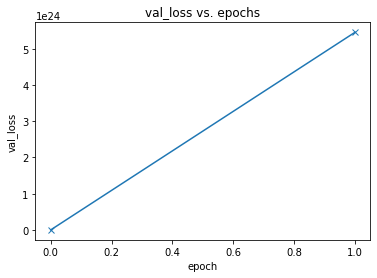

In [17]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

# Predictions

In [18]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [22]:
x, target = val_ds[1]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([ 144.5000, 6657.3999])
Target:  589394.0
Prediction: nan


In [28]:
model(xx)

tensor([nan], grad_fn=<AddBackward0>)

In [26]:
xx , yy = val_ds[0]

pred = model(xx)

loss_fn(pred, yy)

tensor(nan, grad_fn=<MseLossBackward>)

# Save model

In [77]:
torch.save(model.state_dict(), 'cpi-imports-model.pth')

In [78]:
import jovian

In [81]:
jovian.commit(project='Econometrics_data_with_pytorch_Linear_reg', environment=None, outputs=['Econometrics_data_with_pytorch_Linear_reg.pth'])
jovian.commit(project='Econometrics_data_with_pytorch_Linear_reg', environment=None, outputs=['Econometrics_data_with_pytorch_Linear_reg.pth']) # Kaggle commit fails sometimes, so try again..

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "troublem1/Econometrics_data_with_pytorch_Linear_reg"
[jovian] Uploading notebook..
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "Econometrics_data_with_pytorch_Linear_reg.pth" (not found)


[jovian] Committed successfully! https://jovian.ml/troublem1/econometrics-data-with-pytorch-linear-reg


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "troublem1/econometrics-data-with-pytorch-linear-reg" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "Econometrics_data_with_pytorch_Linear_reg.pth" (not found)


[jovian] Committed successfully! https://jovian.ml/troublem1/econometrics-data-with-pytorch-linear-reg


'https://jovian.ml/troublem1/econometrics-data-with-pytorch-linear-reg'